##### Melanoma Detection Assignment
##### Author - Ravi Kumar Dhiman

##### Background:
* Melanoma is a type of cancer that can be deadly if not detected early. 
* It accounts for 75% of skin cancer deaths. 

##### Objective (What):
* To build a CNN based model which can accurately detect melanoma.

##### Reason (Why):
* A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

##### Data Description:
* The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). 
* All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.
* The data set contains the following diseases:
    * Actinic keratosis
    * Basal cell carcinoma
    * Dermatofibroma
    * Melanoma
    * Nevus
    * Pigmented benign keratosis
    * Seborrheic keratosis
    * Squamous cell carcinoma
    * Vascular lesion

##### Model Pipeline:
The model pipeline will be built in following order:
1. __Data Reading/Data Understanding__ → Defining the path for train and test images
2. __Dataset Creation__ → Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.
3. __Dataset visualisation__ → Create a code to visualize one instance of all the nine classes present in the dataset 
4. __Model Building & training__ : 
    1. Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
    2. Choose an appropriate optimiser and loss function for model training
    3. Train the model for ~20 epochs
    4. Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.
5. __Chose an appropriate data augmentation strategy to resolve underfitting/overfitting__
6. __Model Building & training on the augmented data__
    1. Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).
    2. Choose an appropriate optimiser and loss function for model training
    3. Train the model for ~20 epochs
    4. Write your findings after the model fit, see if the earlier issue is resolved or not?
7. __Class distribution__ → Examine the current class distribution in the training dataset 
    1. Which class has the least number of samples?
    2. Which classes dominate the data in terms of the proportionate number of samples?
8. __Handling class imbalances__ → Rectify class imbalances present in the training dataset with Augmentor library.
9. __Model Building & training on the rectified class imbalance data__
    1. Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
    2. Choose an appropriate optimiser and loss function for model training
    3. Train the model for ~30 epochs
    4. Write your findings after the model fit, see if the issues are resolved or not?

### Stage 1 - Data Reading/Data Understanding

In [1]:
# Importing the libraries
import pathlib
import tensorflow as tf
import pandas as pd
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import load_img

/Users/rdhiman/code/Projects/Python_AIML/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

##### This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
# Counting the number of images present in each sub-directory
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


#### Load using keras.preprocessing and image_dataset_from_directory
##### Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Stage 2 - Dataset Creation

In [5]:
# Define some parameters for the loader:
batch_size = 32
img_height = 180
img_width = 180

##### Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writing the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size = batch_size,
    image_size = (img_height, img_width),
    seed=123,
    validation_split=0.8,
    subset='training',
    label_mode='categorical'
)

Found 2239 files belonging to 9 classes.
Using 448 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writing the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size = batch_size,
    image_size = (img_height, img_width),
    seed=123,
    validation_split=0.2,
    subset='validation',
    label_mode='categorical'
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Stage 3 - Dataset Visualisation

Found 2239 files belonging to 9 classes.


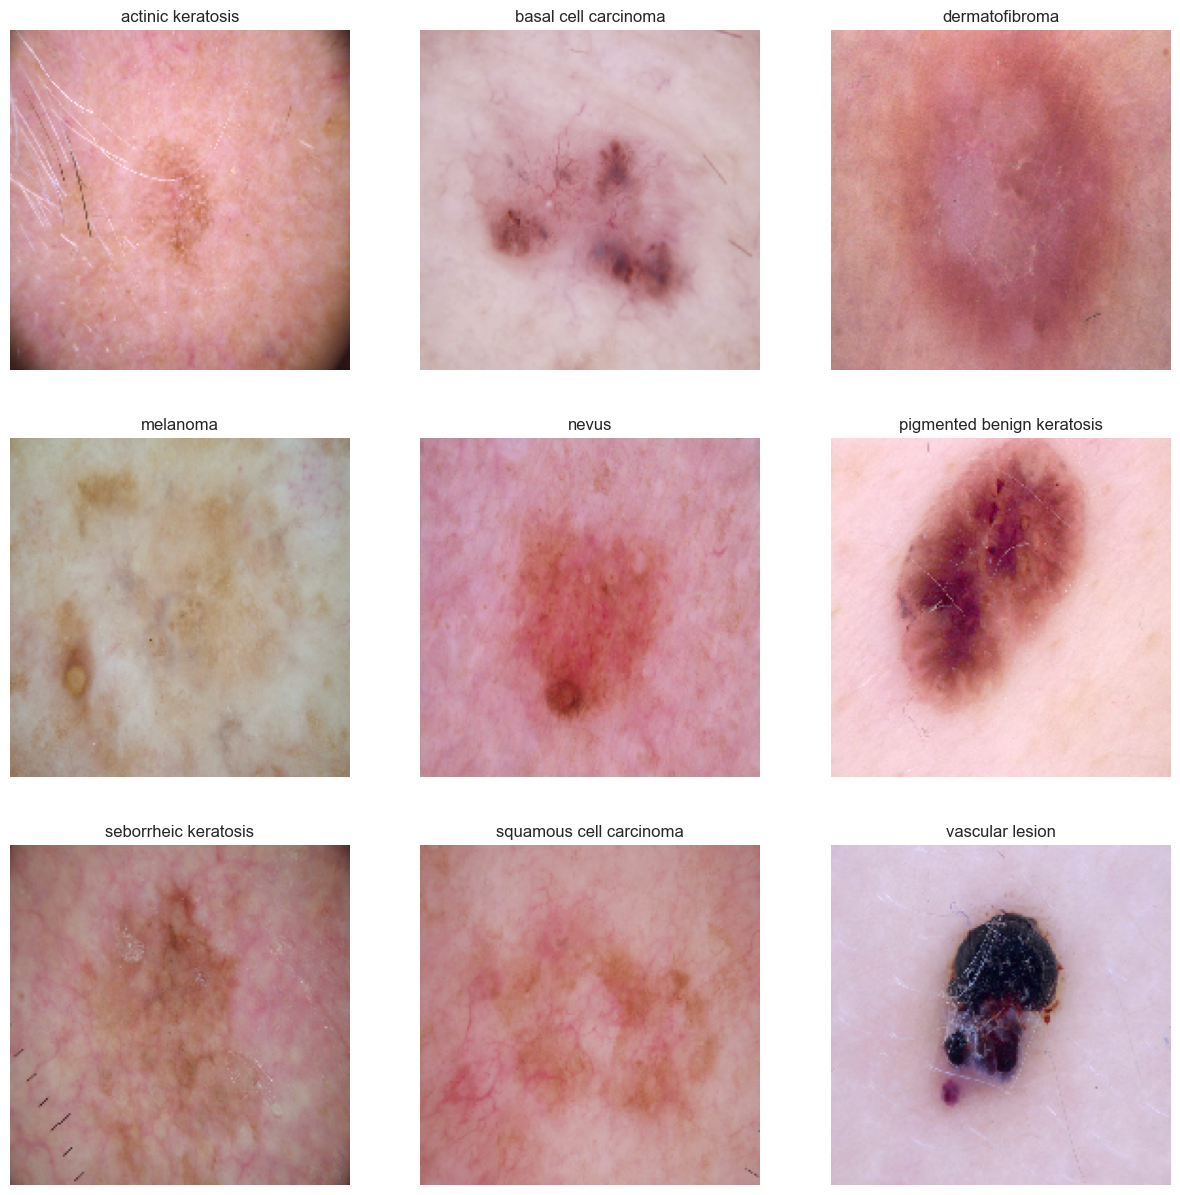

In [9]:
# Create a code to visualize one instance of all the nine classes present in the dataset
import matplotlib.pyplot as plt

#image_dataset_from_directory() will return a tf.data.Dataset that yields batches of images from the subdirectories.
#label_mode is categorial, the labels are a float32 tensor of shape (batch_size, num_classes), representing a one-hot encoding of the class index.
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),
                                                                    label_mode='categorical',seed=123)

#all the classes of Skin Cancer
class_names = image_dataset.class_names

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

#Visualize image 
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

In [10]:
# Visualize distribution of classes in the training dataset
def class_distribution_count(directory):
    # count number of image in each classes
    count = []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                              if os.path.isfile(os.path.join(path, name))]))
    # name of the classes
    sub_directory = [name for name in os.listdir(directory)
                     if os.path.isdir(os.path.join(directory, name))]

    # return dataframe with image count and class.
    return pd.DataFrame(
        list(
            zip(sub_directory,count)
        ),columns =['Class', 'No. of Images'])

class_distribution_df = class_distribution_count(data_dir_train)
class_distribution_df

,Class,No. of Images
0,melanoma,438
1,pigmented benign keratosis,462
2,nevus,357
3,basal cell carcinoma,376
4,actinic keratosis,114
5,squamous cell carcinoma,181
6,vascular lesion,139
7,seborrheic keratosis,77
8,dermatofibroma,95


<Axes: xlabel='No. of Images', ylabel='Class'>

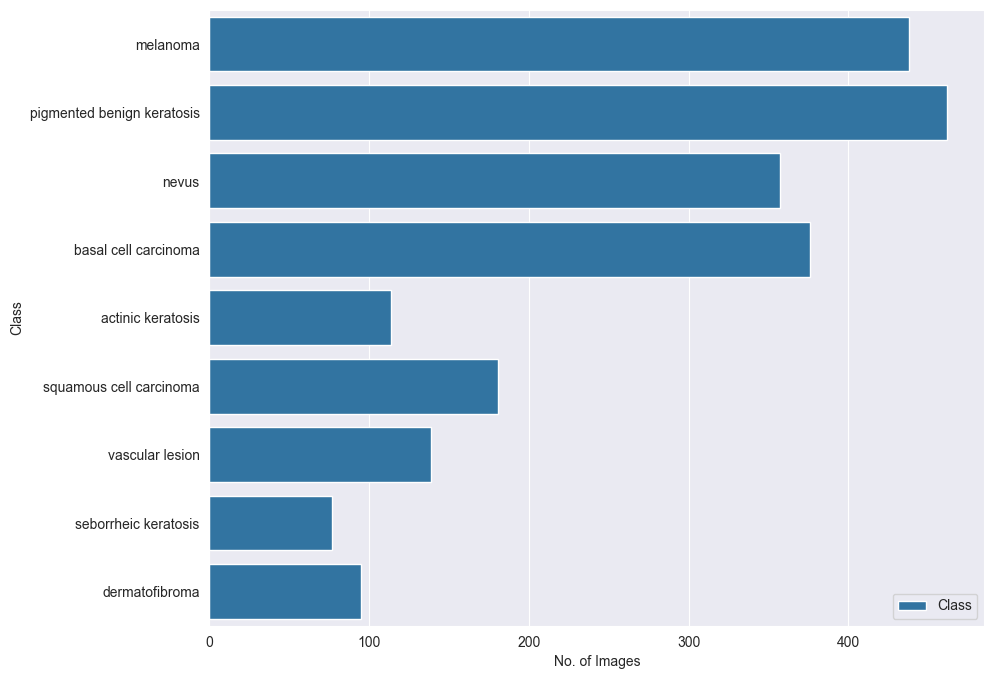

In [11]:
# Visualize the Number of Image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Images", y="Class", data=class_distribution_df, label="Class")

##### There is a class imbalance.
1. To solve this we will use a python package Augmentor - https://augmentor.readthedocs.io/en/master/
2. We need to add more samples across all classes so that none of the classes have very few samples.
3. __Seborrheic Keratosis__ class has the least number of samples
4. __Pigmented Benign Keratosis__, __melanoma__, __nevus__, __basal cell carcinoma__ classes dominate the data in terms proportionate number of samples

##### The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

##### Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.
##### Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Stage 4 - Model Building & Training
* Create a CNN model, which can accurately detect 9 classes present in the dataset. 
* Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). 
* The RGB channel values are in the [0, 255] range. 
* This is not ideal for a neural network. 
* Here, it is good to standardize values to be in the [0, 1]

In [13]:
### Your code goes here

# Sequential allows you to create models layer-by-layer for most problems.
model = Sequential()
# Rescaling Layer
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))

# First Convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(180,180,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

# Flatten Layer
# Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(Flatten())

# Dense Layer
model.add(Dense(128, activation='relu'))

# Dropout layer with 25% Fraction of the input units to drop.
model.add(Dropout(0.25))

# Dense Layer with softmax activation function.
# Softmax is an activation function that scales numbers into probabilities.
model.add(Dense(len(class_names),activation='softmax'))

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

In [15]:
# Compile the model
## Choose an appropriate optimiser and loss function for model training
### Adam Optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
### categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
# the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint(
    "model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="auto",
    verbose=1
)

# Stop training when a monitored metric has stopped improving.
earlyStop = EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    mode="auto",
    verbose=1
)

In [16]:
# Train the model for ~20 epochs
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[checkpoint, earlyStop]
)

Epoch 1/20
14/14 [==============================] - ETA: 0s - loss: 2.1713 - accuracy: 0.2321
Epoch 1: val_accuracy improved from -inf to 0.20358, saving model to model.h5
14/14 [==============================] - 7s 390ms/step - loss: 2.1713 - accuracy: 0.2321 - val_loss: 2.0724 - val_accuracy: 0.2036
Epoch 2/20


/Users/rdhiman/code/Projects/Python_AIML/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - ETA: 0s - loss: 1.9885 - accuracy: 0.2478
Epoch 2: val_accuracy did not improve from 0.20358
14/14 [==============================] - 4s 323ms/step - loss: 1.9885 - accuracy: 0.2478 - val_loss: 1.9589 - val_accuracy: 0.1924
Epoch 3/20
14/14 [==============================] - ETA: 0s - loss: 1.8678 - accuracy: 0.3125
Epoch 3: val_accuracy did not improve from 0.20358
14/14 [==============================] - 4s 324ms/step - loss: 1.8678 - accuracy: 0.3125 - val_loss: 1.9762 - val_accuracy: 0.1991
Epoch 4/20
14/14 [==============================] - ETA: 0s - loss: 1.7820 - accuracy: 0.3281
Epoch 4: val_accuracy improved from 0.20358 to 0.38479, saving model to model.h5
14/14 [==============================] - 5s 367ms/step - loss: 1.7820 - accuracy: 0.3281 - val_loss: 1.7523 - val_accuracy: 0.3848
Epoch 5/20
14/14 [==============================] - ETA: 0s - loss: 1.7833 - accuracy: 0.3304
Epoch 5: val_accuracy did not improve from 0.38479
14/14 [=

In [23]:
# Visualizing training results
def visualize_training_results(obj=history):
    acc = obj.history['accuracy']
    val_acc = obj.history['val_accuracy']
    
    loss = obj.history['loss']
    val_loss = obj.history['val_loss']
    
    epochs_range = range(earlyStop.stopped_epoch + 1)
    
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

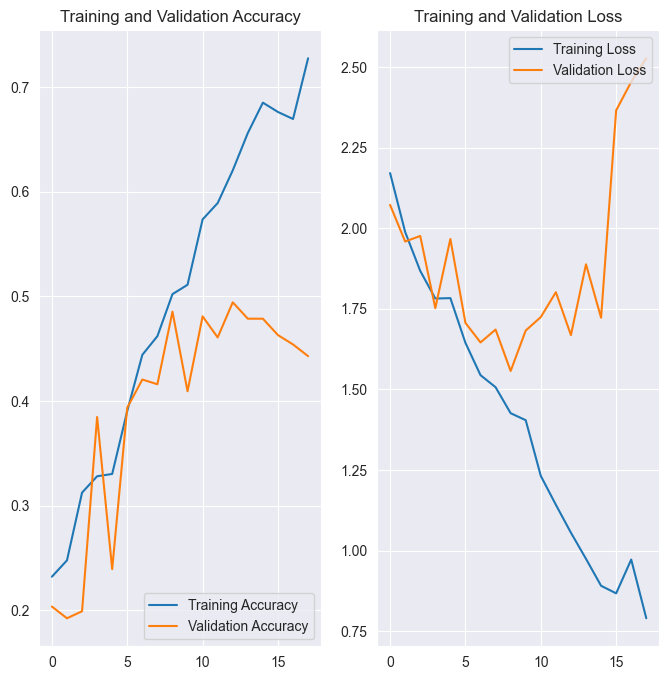

In [24]:
visualize_training_results(history)

##### Write your findings after the model fit, see if there is an evidence of model overfit or underfit?
1. The model is overfitting as the training accuracy is increasing with each epoch but the validation accuracy is not increasing.
2. The training loss is decreasing with each epoch but the validation loss is not decreasing.
3. The model is not able to generalize well on the validation dataset.
4. The model is not able to learn the patterns in the validation dataset.

In [19]:
### Stage 5 - Model Building & training on the augmented data

In [20]:
#install Augmentor
!pip3 install Augmentor

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [21]:
# Your code goes here
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train"
import Augmentor
for name in class_names:
    path = Augmentor.Pipeline(source_directory=path_to_training_dataset + '/' + name)
    path.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    path.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
    path.resize(probability=1.0, width=180, height=180)
    path.sample(500)  #Adding 500 samples per class to make sure that none of the classes are sparse

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x288A29910>: 100%|██████████| 500/500 [00:02<00:00, 217.24 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x288A6A370>: 100%|██████████| 500/500 [00:02<00:00, 203.93 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x28FD31A00>: 100%|██████████| 500/500 [00:02<00:00, 231.63 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x288A914F0>: 100%|██████████| 500/500 [00:10<00:00, 49.69 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x288A64FD0>: 100%|██████████| 500/500 [00:07<00:00, 63.96 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x288AAE3A0>: 100%|██████████| 500/500 [00:03<00:00, 133.13 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x2889D6970>: 100%|██████████| 500/500 [00:04<00:00, 110.39 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x2889D80D0>: 100%|██████████| 500/500 [00:02<00:00, 234.08 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x2889AB2B0>: 100%|██████████| 500/500 [00:02<00:00, 233.48 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types. Lets take a look at total count of augmented images.

##### Lets see the distribution of augmented data after adding new images to the original training data.

In [50]:
from glob import glob

path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [51]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','', '*.jpg'))]

In [52]:
lesion_list = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','', '*.jpg'))]

In [53]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [54]:
original_df = pd.DataFrame(list(zip(path_list, lesion_list)), columns = ['Path','Label'])
original_df.head()

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,Train
1,Skin cancer ISIC The International Skin Imagin...,Train
2,Skin cancer ISIC The International Skin Imagin...,Train
3,Skin cancer ISIC The International Skin Imagin...,Train
4,Skin cancer ISIC The International Skin Imagin...,Train


In [55]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [56]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns = ['Path','Label'])
df2.head()

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,melanoma
1,Skin cancer ISIC The International Skin Imagin...,melanoma
2,Skin cancer ISIC The International Skin Imagin...,melanoma
3,Skin cancer ISIC The International Skin Imagin...,melanoma
4,Skin cancer ISIC The International Skin Imagin...,melanoma


In [57]:
new_df = original_df.add(df2)
new_df.head()

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,Trainmelanoma
1,Skin cancer ISIC The International Skin Imagin...,Trainmelanoma
2,Skin cancer ISIC The International Skin Imagin...,Trainmelanoma
3,Skin cancer ISIC The International Skin Imagin...,Trainmelanoma
4,Skin cancer ISIC The International Skin Imagin...,Trainmelanoma


In [58]:
new_df['Label'].value_counts()

Label
Trainmelanoma                      500
Trainpigmented benign keratosis    500
Trainnevus                         500
Trainbasal cell carcinoma          500
Trainactinic keratosis             239
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [34]:
from PIL import Image

# write a function to check the corrupted images and delete them
def check_corrupted_images(directory):
    num_skipped = 0
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            for subpath in path.iterdir():
                if subpath.is_dir():
                    for image_path in subpath.iterdir():
                        try:
                            img = Image.open(image_path)
                            img.verify()
                        except:
                            print("Invalid image:", image_path)
                            num_skipped += 1
                            # Delete corrupted image
                            os.remove(image_path)

check_corrupted_images(path_to_training_dataset)


In [35]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)


4500


In [36]:
# Create the model, compile and train the model
train_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size = batch_size,
    image_size = (img_height, img_width),
    seed=123,
    validation_split=0.8,
    subset='training',
    label_mode='categorical'
)

Found 6739 files belonging to 9 classes.
Using 1348 files for training.


In [37]:
val_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size = batch_size,
    image_size = (img_height, img_width),
    seed=123,
    validation_split=0.2,
    subset='validation',
    label_mode='categorical'
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [38]:
# tf.data.experimental.AUTOTUNE defines appropriate number of processes that are free for working.
#`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.
#`Dataset.prefetch()` overlaps data preprocessing and model execution while training.
AUTOTUNE1 = tf.data.experimental.AUTOTUNE
train_ds_new = train_ds_new.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE1)
val_ds_new = val_ds_new.cache().prefetch(buffer_size=AUTOTUNE1)

In [39]:
# CNN Model Architecture

# Sequential allows you to create models layer-by-layer for most problems.
model_new = Sequential()
# Rescaling Layer
model_new.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))

# First Convolutional layer
model_new.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(180,180,3)))
model_new.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional layer
model_new.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_new.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional layer
model_new.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_new.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer with 50% Fraction of the input units to drop.
model_new.add(layers.Dropout(0.5))

# Flatten Layer
# Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model_new.add(Flatten())

# Dense Layer
model_new.add(Dense(128, activation='relu'))

# Dropout layer with 25% Fraction of the input units to drop.
model_new.add(Dropout(0.25))

# Dense Layer with softmax activation function.
# Softmax is an activation function that scales numbers into probabilities.
model_new.add(Dense(len(class_names),activation='softmax'))

In [40]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 128)      

In [41]:
# Compile the Model

# Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
# categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model_new.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [43]:
# Train the model for ~30 epochs
epochs = 30
history_new = model_new.fit(
    train_ds_new,
    validation_data=val_ds_new,
    epochs=epochs,
    callbacks=[checkpoint, earlyStop]
)

Epoch 1/30
43/43 [==============================] - ETA: 0s - loss: 2.1859 - accuracy: 0.1580

Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: pr


Epoch 1: val_accuracy did not improve from 0.49441
43/43 [==============================] - 15s 350ms/step - loss: 2.1859 - accuracy: 0.1580 - val_loss: 2.1185 - val_accuracy: 0.1373
Epoch 2/30
43/43 [==============================] - ETA: 0s - loss: 2.0783 - accuracy: 0.2062
Epoch 2: val_accuracy did not improve from 0.49441
43/43 [==============================] - 14s 327ms/step - loss: 2.0783 - accuracy: 0.2062 - val_loss: 1.9309 - val_accuracy: 0.3370
Epoch 3/30
43/43 [==============================] - ETA: 0s - loss: 1.7803 - accuracy: 0.3316
Epoch 3: val_accuracy did not improve from 0.49441
43/43 [==============================] - 14s 330ms/step - loss: 1.7803 - accuracy: 0.3316 - val_loss: 1.6117 - val_accuracy: 0.3920
Epoch 4/30
43/43 [==============================] - ETA: 0s - loss: 1.5856 - accuracy: 0.4065
Epoch 4: val_accuracy did not improve from 0.49441
43/43 [==============================] - 14s 330ms/step - loss: 1.5856 - accuracy: 0.4065 - val_loss: 1.6536 - val_ac

/Users/rdhiman/code/Projects/Python_AIML/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


43/43 [==============================] - ETA: 0s - loss: 1.0834 - accuracy: 0.6061
Epoch 12: val_accuracy did not improve from 0.50483
43/43 [==============================] - 14s 330ms/step - loss: 1.0834 - accuracy: 0.6061 - val_loss: 1.4269 - val_accuracy: 0.4707
Epoch 13/30
43/43 [==============================] - ETA: 0s - loss: 1.0098 - accuracy: 0.6261
Epoch 13: val_accuracy improved from 0.50483 to 0.50780, saving model to model.h5
43/43 [==============================] - 14s 328ms/step - loss: 1.0098 - accuracy: 0.6261 - val_loss: 1.4008 - val_accuracy: 0.5078
Epoch 14/30
43/43 [==============================] - ETA: 0s - loss: 0.9747 - accuracy: 0.6365
Epoch 14: val_accuracy improved from 0.50780 to 0.51225, saving model to model.h5
43/43 [==============================] - 14s 335ms/step - loss: 0.9747 - accuracy: 0.6365 - val_loss: 1.3963 - val_accuracy: 0.5122
Epoch 15/30
43/43 [==============================] - ETA: 0s - loss: 0.8768 - accuracy: 0.6936
Epoch 15: val_accura

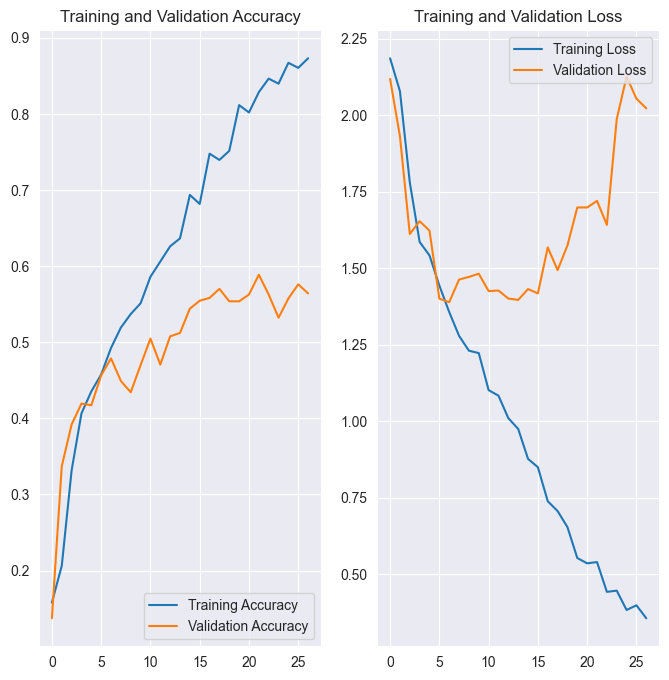

In [44]:
visualize_training_results(history_new)

1/1 [==============================] - 0s 15ms/step
Actual Class basal cell carcinoma
Predictive Class pigmented benign keratosis


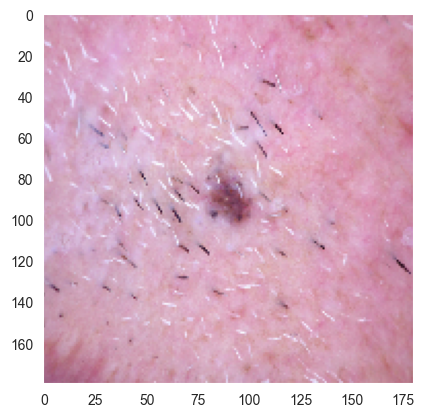

In [46]:
import numpy as np
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+pred_class )

### Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
1. The model is overfitting as the training accuracy is increasing with each epoch but the validation accuracy is not increasing.
2. The training loss is decreasing with each epoch but the validation loss is not decreasing.
3. The model is not able to generalize well on the validation dataset.
4. The model is not able to learn the patterns in the validation dataset.
5. The model did not got rid of overfitting/underfitting even after adding more samples to the training dataset i.e. class rebalance did not help.